In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost as xgb

In [6]:
#for impoting module of xgboost .
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.1.0-posix-seh-rt_v5-rev2\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [7]:
#reading files
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [8]:
#correlation matix .
corrmat = train.corr()

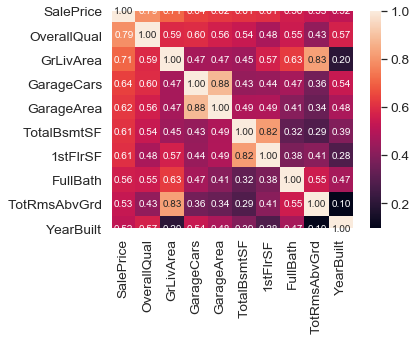

In [9]:
#heatmap of coorelation .
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [10]:
#selecting the top correlated variables .
df_train = train.loc[:,['OverallQual','YearRemodAdd','TotalBsmtSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','SalePrice']]

In [11]:
#splitting into test and train .
y = df_train.pop('SalePrice')
X_train, X_test, y_train, y_test = train_test_split(df_train, y , test_size=0.2 )

In [12]:
#dropping index and renaming it from 0 .
y_train = y_train.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [13]:
#fitting a linear regression model .
regr = linear_model.LinearRegression()
l_model = regr.fit(X_train,y_train)
prediction = regr.predict(X_test)
prediction =  pd.Series(prediction)
error_df_linear = pd.concat([y_test,prediction] , axis=1)
error_df_linear['error'] = (error_df_linear['SalePrice'] - error_df_linear[0])*(error_df_linear['SalePrice'] - error_df_linear[0])

In [ ]:
#fitting a XGBoost model .
dtrain = xgb.DMatrix(X_train , label = y_train)
param = { 'objective':'reg:linear' }
xgb_model = xgb.train(param , dtrain , 10 )
dtest = xgb.DMatrix(X_test)
y_xgb_predict = xgb_model.predict(dtest)
y_xgb_predict =  pd.Series(y_xgb_predict)
error_df = pd.concat([y_test,y_xgb_predict] , axis=1)
error_df['error'] = (error_df['SalePrice'] - error_df[0])*(error_df['SalePrice'] - error_df[0])